## Fotos Laden

In [86]:
from keras.datasets import mnist

In [87]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Foto Plotten

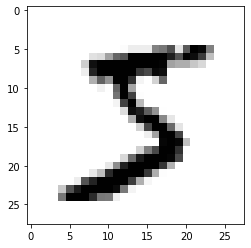

In [88]:
import matplotlib.pyplot as plt
digits = train_images.copy()
digit = digits[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Daten vorbereiten 

In [89]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [90]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Modell

In [91]:
import numpy as np
from keras import models
from keras import layers

In [57]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='mse',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0897 - accuracy: 0.1496
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0868 - accuracy: 0.2888
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0835 - accuracy: 0.4199
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0796 - accuracy: 0.5231
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0748 - accuracy: 0.5926


In [63]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2626 - accuracy: 0.9229
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1039 - accuracy: 0.9682
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0682 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0493 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0375 - accuracy: 0.9891


In [92]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.9800999760627747


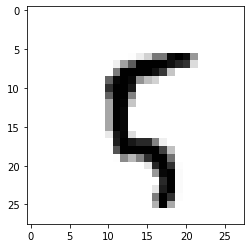

Recognized digit: 5


In [100]:
index = 100
plt.imshow(digits[index], cmap=plt.cm.binary)
plt.show()
prediction = np.argmax(network.predict(np.expand_dims(train_images[index], axis=0)).round(2))
print("Recognized digit:",prediction)